In [1]:
#Date:05-07-2022
#Name: Domala Vamshikrishna
#prediction with Seasonal decompose
#Model: Significant wave height prediction with LSTM
 

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional

In [3]:
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(1)

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from numpy import array

In [5]:
#n_timestamp=240
#train_days=8760
#testing_days=2904
#n_epochs=50
#filter_on=1

In [6]:
#model_type=2

In [7]:
dataset=pd.read_excel(r"HP_decom1.xlsx")

In [8]:
dataset

,Date,cycle,trend
0,2016-01-01 00:00:00,0.009073,3.160927
1,2016-01-01 01:00:00,0.020538,3.099462
2,2016-01-01 02:00:00,0.171821,3.038179
3,2016-01-01 03:00:00,-0.177670,2.977670
4,2016-01-01 04:00:00,0.128038,2.921962
...,...,...,...
52603,2021-12-31 19:00:00,0.183586,2.836414
52604,2021-12-31 20:00:00,0.098021,2.861979
52605,2021-12-31 21:00:00,0.032990,2.887010
52606,2021-12-31 22:00:00,-0.021387,2.911387


In [9]:
dataset.reset_index()['trend'] #select date and close price for fitting the model

0        3.160927
1        3.099462
2        3.038179
3        2.977670
4        2.921962
           ...   
52603    2.836414
52604    2.861979
52605    2.887010
52606    2.911387
52607    2.935651
Name: trend, Length: 52608, dtype: float64

In [10]:
dataset=dataset.reset_index()['trend']

In [11]:
dataset

0        3.160927
1        3.099462
2        3.038179
3        2.977670
4        2.921962
           ...   
52603    2.836414
52604    2.861979
52605    2.887010
52606    2.911387
52607    2.935651
Name: trend, Length: 52608, dtype: float64

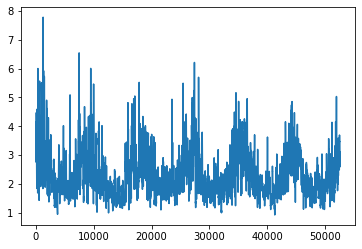

In [12]:
plt.plot(dataset)

In [13]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler=MinMaxScaler(feature_range=(0,1))
dataset=scaler.fit_transform(np.array(dataset).reshape(-1,1))

In [14]:
dataset

array([[0.32580152],
       [0.31683209],
       [0.30788914],
       ...,
       [0.28582937],
       [0.28938666],
       [0.29292745]])

In [15]:
training_size=int(len(dataset)*0.75)
test_size=len(dataset)-training_size
train_data,test_data=dataset[0:training_size,:],dataset[training_size:len(dataset),:1]

In [16]:
training_size, test_size

(39456, 13152)

In [17]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step): 
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
time_step = 24
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(39432, 24)
(39432,)


(None, None)

In [20]:
print(X_test.shape), print(ytest.shape)

(13128, 24)
(13128,)


(None, None)

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
X_train.shape

(39432, 24, 1)

In [23]:
X_test.shape

(13128, 24, 1)

In [24]:
#LSTM model with 3 hidden layers and 32nodes 
from keras.layers import Dropout
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(24,1)))

model.add(LSTM(32,return_sequences=True))

model.add(LSTM(32))

model.add(Dense(1))
model.compile(loss='mean_absolute_error',optimizer='adam')


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 24, 32)            4352      
_________________________________________________________________
lstm_1 (LSTM)                (None, 24, 32)            8320      
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [26]:
history=model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=20,batch_size=64,verbose=1)

Epoch 1/20
617/617 [==============================] - 17s 20ms/step - loss: 0.0319 - val_loss: 0.0061
Epoch 2/20
617/617 [==============================] - 10s 16ms/step - loss: 0.0047 - val_loss: 0.0029
Epoch 3/20
617/617 [==============================] - 9s 15ms/step - loss: 0.0027 - val_loss: 0.0012
Epoch 4/20
617/617 [==============================] - 9s 15ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 5/20
617/617 [==============================] - 10s 16ms/step - loss: 0.0018 - val_loss: 0.0028
Epoch 6/20
617/617 [==============================] - 10s 16ms/step - loss: 0.0020 - val_loss: 7.1018e-04
Epoch 7/20
617/617 [==============================] - 9s 15ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 8/20
617/617 [==============================] - 9s 15ms/step - loss: 0.0016 - val_loss: 0.0025
Epoch 9/20
617/617 [==============================] - 10s 16ms/step - loss: 0.0018 - val_loss: 0.0033
Epoch 10/20
617/617 [==============================] - 10s 16ms/step - loss: 0.001

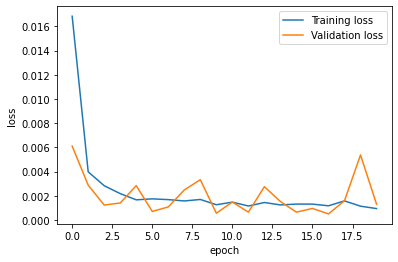

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel("epoch")
plt.ylabel("loss")

plt.legend()

In [28]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [29]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error


In [32]:
df1=pd.read_excel("HP_decom1.xlsx")

In [33]:
df1

,Date,cycle,trend
0,2016-01-01 00:00:00,0.009073,3.160927
1,2016-01-01 01:00:00,0.020538,3.099462
2,2016-01-01 02:00:00,0.171821,3.038179
3,2016-01-01 03:00:00,-0.177670,2.977670
4,2016-01-01 04:00:00,0.128038,2.921962
...,...,...,...
52603,2021-12-31 19:00:00,0.183586,2.836414
52604,2021-12-31 20:00:00,0.098021,2.861979
52605,2021-12-31 21:00:00,0.032990,2.887010
52606,2021-12-31 22:00:00,-0.021387,2.911387


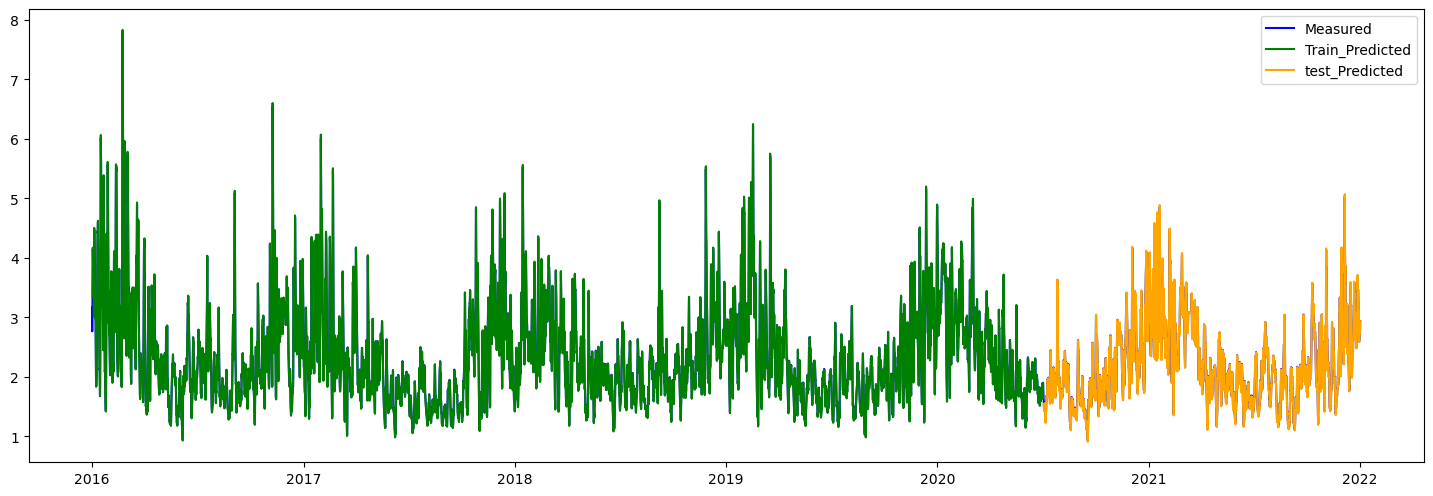

In [34]:
### Plotting 
# shift train predictions for plotting
look_back=24
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2):len(dataset), :] = test_predict
# plot baseline and predictions
fig = plt.figure(figsize=(18, 6), dpi=100)
plt.plot(df1['Date'], scaler.inverse_transform(dataset), label='Measured', color='blue')
#plt.plot(scaler.inverse_transform(dataset))
plt.plot(df1['Date'],trainPredictPlot, label='Train_Predicted', color='green')
plt.plot(df1['Date'], testPredictPlot, label='test_Predicted', color='orange')
#plt.plot(df1['Date'])
plt.legend(loc='upper right')
plt.show()

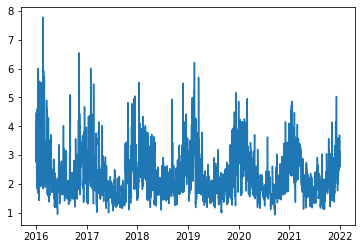

In [35]:
plt.plot(df1['Date'], scaler.inverse_transform(dataset))

In [36]:
df2=df1[24:39456]

In [37]:
df2

,Date,cycle,trend
24,2016-01-02 00:00:00,-0.400928,3.350928
25,2016-01-02 01:00:00,0.062043,3.427957
26,2016-01-02 02:00:00,0.133044,3.516956
27,2016-01-02 03:00:00,-0.315375,3.615375
28,2016-01-02 04:00:00,-0.173324,3.723324
...,...,...,...
39451,2020-07-01 19:00:00,0.004714,1.895286
39452,2020-07-01 20:00:00,-0.038626,1.888626
39453,2020-07-01 21:00:00,-0.010904,1.880904
39454,2020-07-01 22:00:00,-0.012185,1.872185


In [38]:
train_predict.shape

(39432, 1)

In [39]:
trainPredictPlot.shape

(52608, 1)

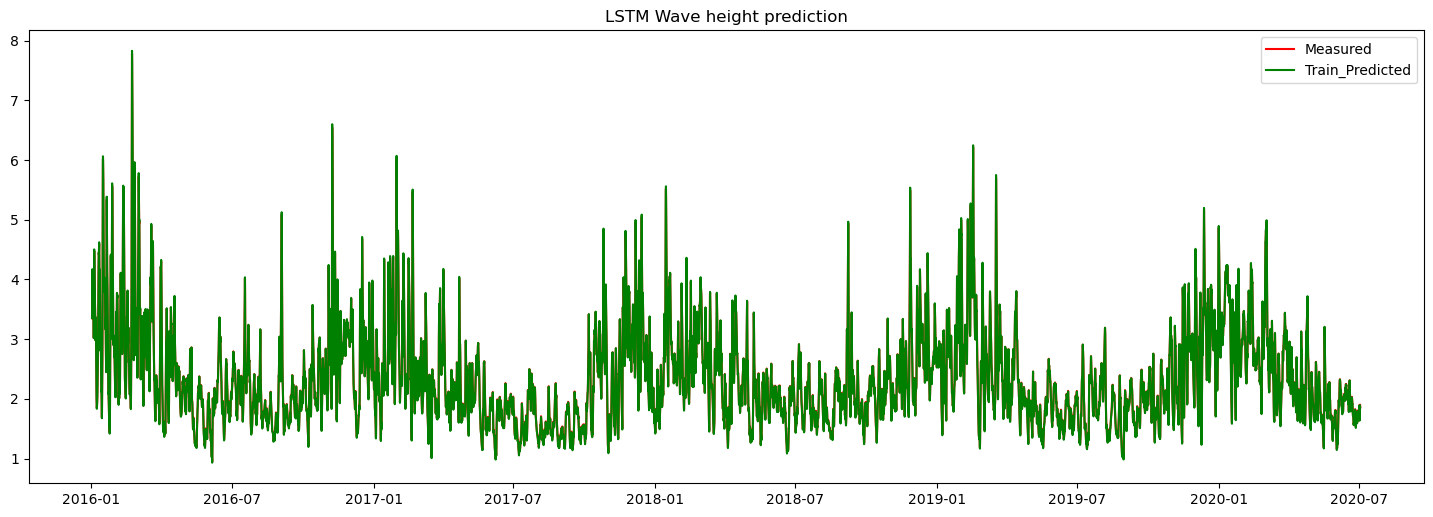

In [40]:
fig = plt.figure(figsize=(18, 6), dpi=100)
plt.plot(df2['Date'],df2['trend'], label='Measured', color='red')
plt.plot(df2['Date'],train_predict, label='Train_Predicted', color='green')
plt.title("LSTM Wave height prediction")
plt.legend(loc='upper right')
plt.show()

In [41]:
r2_score(df2['trend'],train_predict)

0.9998046716401904

In [42]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df2['trend'],train_predict)

0.009252563310685052

In [43]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(df2['trend'],train_predict))

0.010891549339895093

In [44]:
df3=df1[39480:]

In [45]:
df3

,Date,cycle,trend
39480,2020-07-03 00:00:00,0.058011,1.551989
39481,2020-07-03 01:00:00,0.059589,1.540411
39482,2020-07-03 02:00:00,-0.046895,1.526895
39483,2020-07-03 03:00:00,-0.053566,1.513566
39484,2020-07-03 04:00:00,-0.011611,1.501611
...,...,...,...
52603,2021-12-31 19:00:00,0.183586,2.836414
52604,2021-12-31 20:00:00,0.098021,2.861979
52605,2021-12-31 21:00:00,0.032990,2.887010
52606,2021-12-31 22:00:00,-0.021387,2.911387


In [46]:
test_predict.shape

(13128, 1)

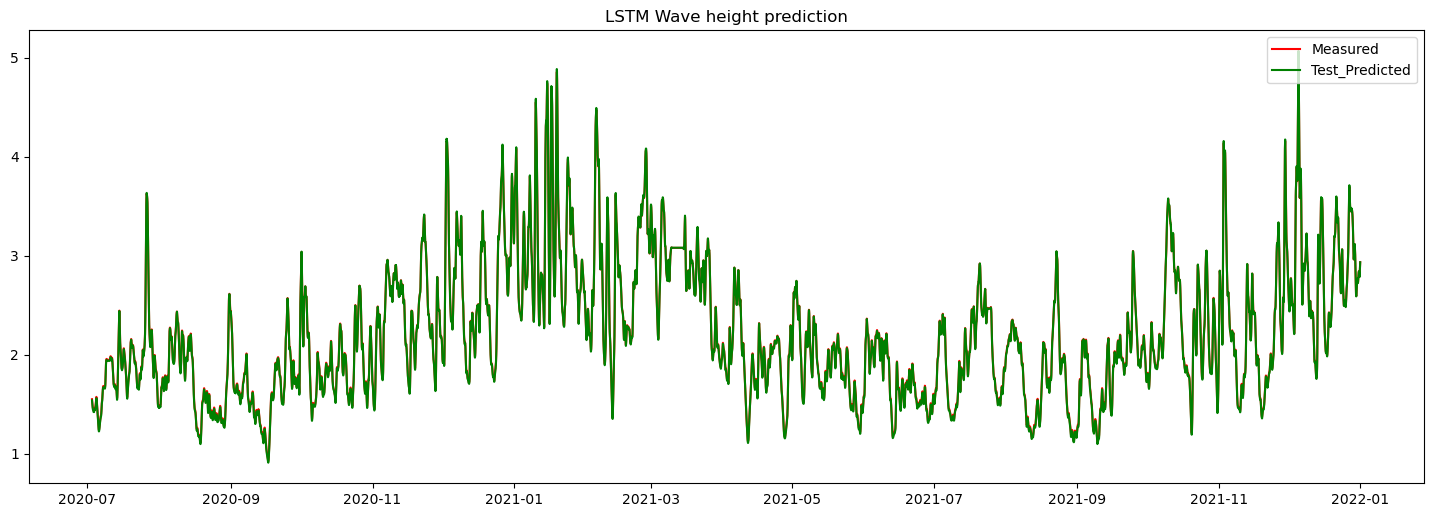

In [47]:
fig = plt.figure(figsize=(18, 6), dpi=100)
plt.plot(df3['Date'],df3['trend'], label='Measured', color='red')
plt.plot(df3['Date'], test_predict, label='Test_Predicted', color='green')
plt.title("LSTM Wave height prediction")
plt.legend(loc='upper right')
plt.show()

In [48]:
r2_score(df3['trend'],test_predict)

0.9997574208232781

In [49]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df3['trend'],test_predict)

0.009005449310029664

In [50]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(df3['trend'],test_predict))

0.010193281800296876

In [51]:
df4=df1[39480:40480]

In [52]:
df4

,Date,cycle,trend
39480,2020-07-03 00:00:00,0.058011,1.551989
39481,2020-07-03 01:00:00,0.059589,1.540411
39482,2020-07-03 02:00:00,-0.046895,1.526895
39483,2020-07-03 03:00:00,-0.053566,1.513566
39484,2020-07-03 04:00:00,-0.011611,1.501611
...,...,...,...
40475,2020-08-13 11:00:00,0.036344,2.113656
40476,2020-08-13 12:00:00,-0.098410,2.128410
40477,2020-08-13 13:00:00,-0.042903,2.142903
40478,2020-08-13 14:00:00,0.103562,2.156438


In [53]:
test_predict1=test_predict[0:1000]

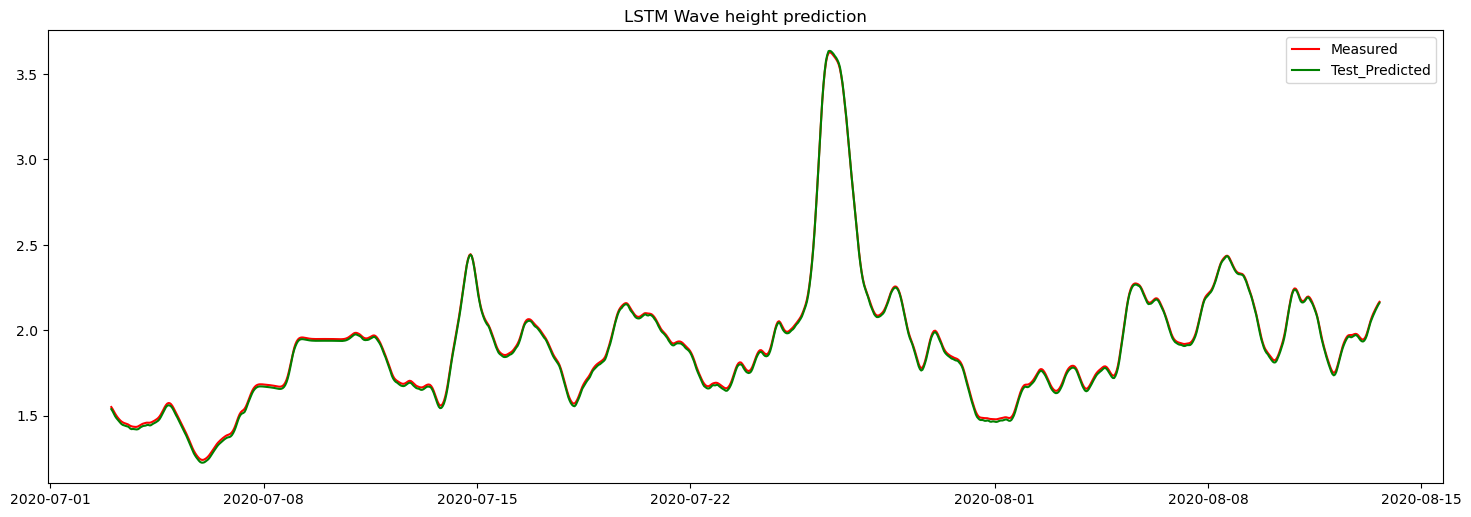

In [54]:
fig = plt.figure(figsize=(18, 6), dpi=100)
plt.plot(df4['Date'],df4['trend'], label='Measured', color='red')
plt.plot( df4['Date'],test_predict1, label='Test_Predicted', color='green')
plt.title("LSTM Wave height prediction")
plt.legend(loc='upper right')
plt.show()

In [55]:
r2_score(df3['trend'],test_predict)

0.9997574208232781

In [56]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df3['trend'],test_predict)

0.009005449310029664

In [57]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(df3['trend'],test_predict))

0.010193281800296876

In [58]:
test_predict.shape

(13128, 1)

In [59]:
df3

,Date,cycle,trend
39480,2020-07-03 00:00:00,0.058011,1.551989
39481,2020-07-03 01:00:00,0.059589,1.540411
39482,2020-07-03 02:00:00,-0.046895,1.526895
39483,2020-07-03 03:00:00,-0.053566,1.513566
39484,2020-07-03 04:00:00,-0.011611,1.501611
...,...,...,...
52603,2021-12-31 19:00:00,0.183586,2.836414
52604,2021-12-31 20:00:00,0.098021,2.861979
52605,2021-12-31 21:00:00,0.032990,2.887010
52606,2021-12-31 22:00:00,-0.021387,2.911387


In [60]:
test_predict2=test_predict[0:336]

In [61]:
df5=df1[39480:39816]

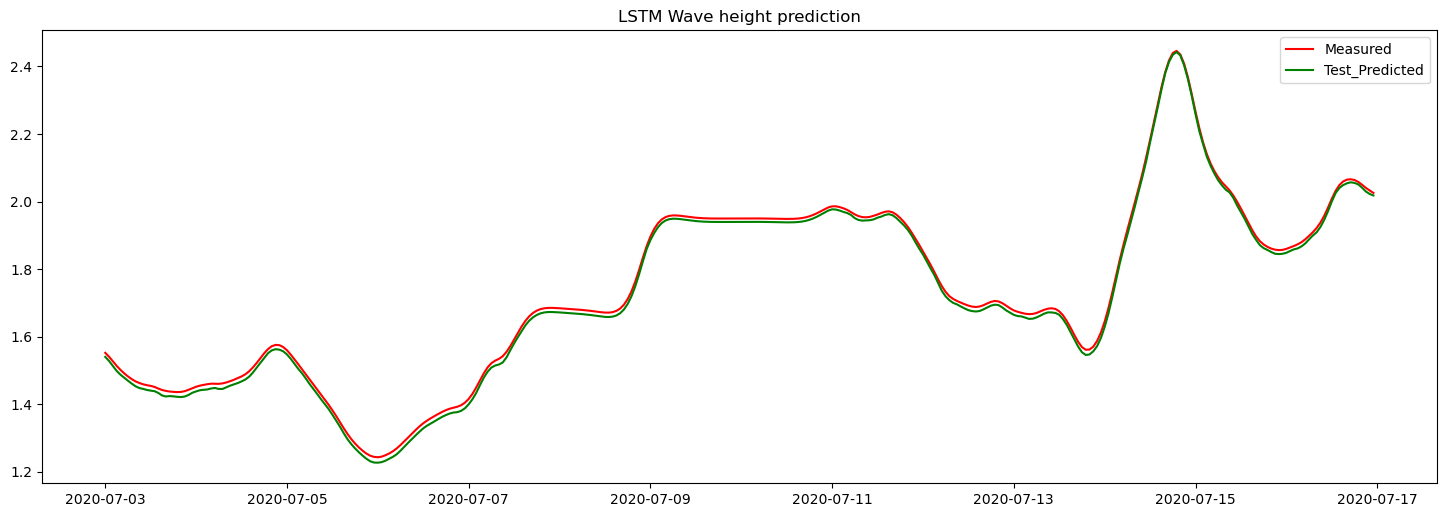

In [62]:
fig = plt.figure(figsize=(18, 6), dpi=100)
plt.plot(df5['Date'],df5['trend'], label='Measured', color='red')
plt.plot(df5['Date'], test_predict2, label='Test_Predicted', color='green')
plt.title("LSTM Wave height prediction")
plt.legend(loc='upper right')
plt.show()

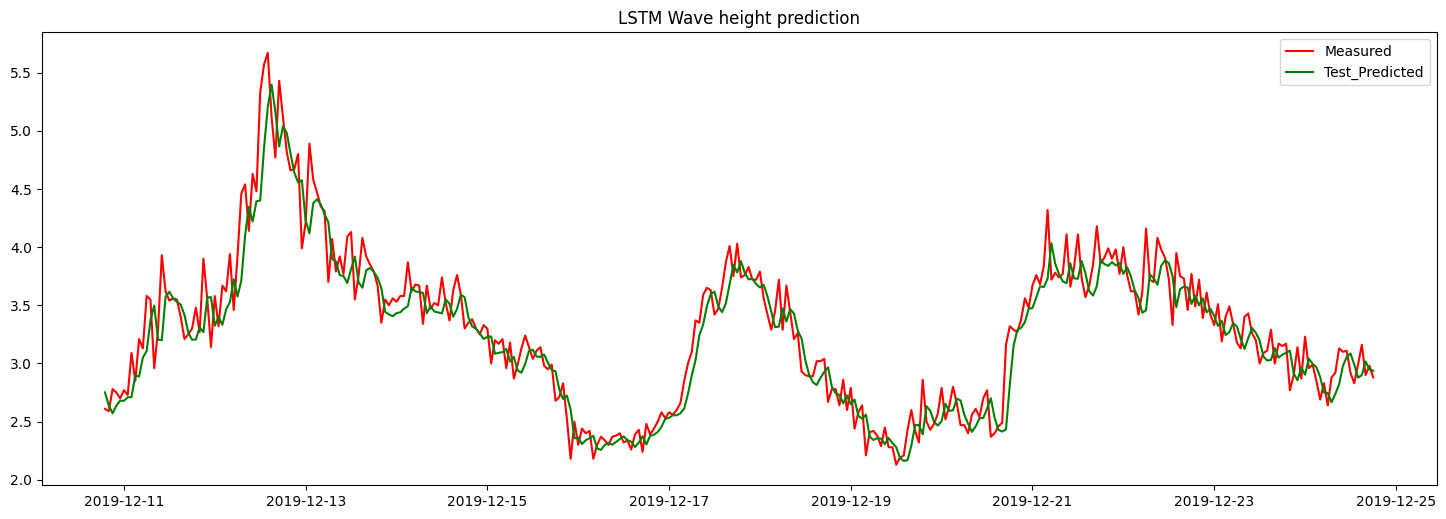

In [78]:
dict={'train_predict':train_predict, 'test_predict':test_predict}

In [79]:
dict

{'train_predict': array([[3.3741236],
        [3.4502594],
        [3.5487368],
        ...,
        [1.8858862],
        [1.8771656],
        [1.8674109]], dtype=float32),
 'test_predict': array([[1.5543061],
        [1.5422556],
        [1.5273625],
        ...,
        [2.902498 ],
        [2.9275348],
        [2.9540865]], dtype=float32)}

In [81]:
HP_trend_train=pd.DataFrame(train_predict)

In [82]:
HP_trend_train.to_excel("HP_trend_train.xlsx")

In [83]:
HP_trend_test=pd.DataFrame(test_predict)

In [84]:
HP_trend_test.to_excel("HP_trend_test.xlsx")